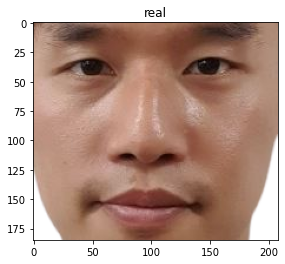

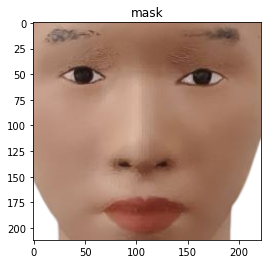

In [91]:
import cv2
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Training/1/KINECT/Light_02_Mid/real_01/color/crop/001.jpg"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Training/1/KINECT/Light_02_Mid/attack_07_3d_mask/color/crop/001.jpg"

#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/real_bg_black.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/mask_bg_black.png"
#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/real_bg_white.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/mask_bg_white.png"

#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_real_crop_white.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_mask_crop_white.png"
#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_real_crop_black.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_mask_crop_black.png"

#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_real_woglass_crop_white.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_mask_woglass_crop_white.png"
#real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_real_woglass_crop_black.png"
#mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/1_mask_woglass_crop_black.png"

real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/figure1_real_crop_white.png"
mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/figure1_mask_crop_white.png"


# print
real_image = Image.open(real_path)
mask_image = Image.open(mask_path)

plt.imshow(real_image)
plt.title("real")
plt.show()

plt.imshow(mask_image)
plt.title("mask")
plt.show()

In [92]:
real_cv = cv2.imread(real_path)
mask_cv = cv2.imread(mask_path)

mean_real, std_real = cv2.meanStdDev(real_cv)
mean_mask, std_mask = cv2.meanStdDev(mask_cv)

color = ('blue', 'green', 'red')

for i in range(3):
    print(f"{color[i]}: {std_real[i]}")
    
for i in range(3):
    print(f"{color[i]}: {std_mask[i]}")


    
#face = real_cv
face = mask_cv

index = 2

#std_matirx = [0,0,0]
std_matirx = [255,255,255]

width, height, _ = face.shape
    

# np.all(numpy array1 == numpay array2) 와  np.any(...) 의 쓰임새
total, num = 0, 0
for i in range(width):
    for j in range(height):
        if np.all(face[i][j] == std_matirx):
            continue
                
        total = total + face[i][j][index]
        num = num + 1

mean = total/num
print(f"\nmean: {mean}")

dev_sum, num = 0, 0
for i in range(width):
    for j in range(height):
        if np.all(face[i][j] == std_matirx):
            continue
            
        dev_sum = dev_sum + math.pow(face[i][j][index]-mean, 2)    
        num = num + 1

dev = dev_sum/num

print(f"std dev: {math.sqrt(dev)}")


blue: [46.52621739]
green: [44.94823004]
red: [39.72591172]
blue: [44.24905777]
green: [41.0334865]
red: [32.93329588]

mean: 163.86436503671862
std dev: 26.82048221492492


In [1]:
# real's variation > fake's variation  (expected) 

# 안경 안쓴 사진으로 피부만 crop한 사진 ************************
# bg white 일 때 (255 제외하지 않을 때)   bg white 일 때 (255 제외할 때)       
#           real         mask             real         mask
# blue     46.52        39.48            35.89        29.36
# green    44.94        37.41            36.67        29.51
# red      39.72        30.56            35.75        26.82




# 김용래 사진 (처음)
# bg Black 일 때 (0 제외할 때)     bg balck 일 때 (0 제외하지 않을 때)
#           real        mask              real        mask
# blue      28.32      30.02             30.45       33.89 
# green     41.97      43.84             45.51       50.21
# red       55.52      56.57             60.59       65.59

# bg white 일 때 (255 제외할 때)   bg white 일 때 (255 제외하지 않을 때)        =>
#           real         mask             real        mask
# blue     44.64        44.14            104.86      101.11
# green    50.88        49.79             96.63       91.27
# red      59.58        57.66             90.14       83.74

# 김용래 사진 (나중껏)
# bg Black 일 때 (0 제외하지 않을 때)     bg balck 일 때 (0 제외할 때)
#           real        mask              real        mask
# blue     39.13       50.06             34.53       46.13
# green    54.88       63.07             47.99       58.03
# red      76.41       82.10             67.09       75.85

# bg white 일 때 (255 제외하지 않을 때)   bg white 일 때 (255 제외할 때)      
#           real         mask             real        mask
# blue     95.31        92.80             41.86       54.56
# green    88.57        89.05             51.28       62.27
# red      84.24        87.32             67.16       75.89

# 김용래 사진 (세번째 안경 안 쓴 것)
# bg Black 일 때 (0 제외하지 않을 때)     bg balck 일 때 (0 제외할 때)
#           real        mask              real        mask
# blue     32.68       36.31             29.40        31.26
# green    48.92       52.86             43.76        44.94
# red      64.90       69.24             57.64        58.34

# bg white 일 때 (255 제외하지 않을 때)   bg white 일 때 (255 제외할 때)       =>      
#           real         mask             real        mask
# blue     95.64        93.93            49.35        46.60     
# green    88.12        85.14            53.64        51.21
# red      83.11        79.02            61.18        58.94







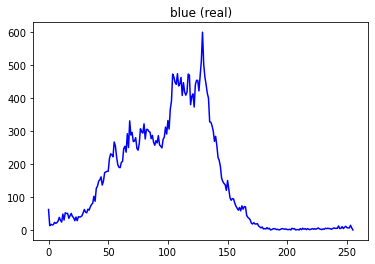

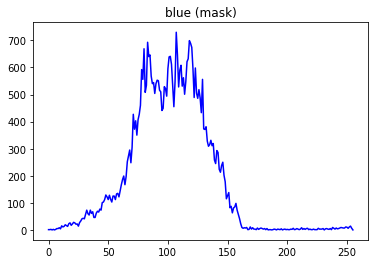

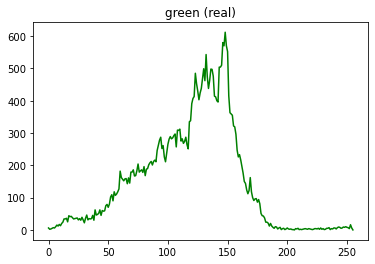

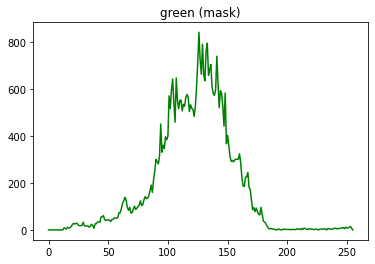

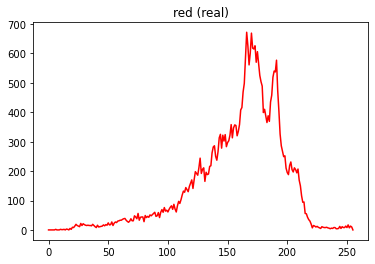

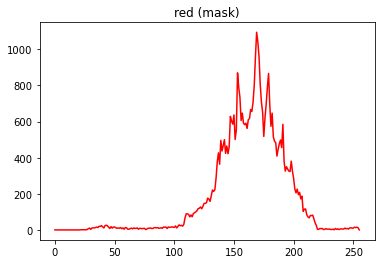

In [93]:
for i, col in enumerate(color):
    histr = cv2.calcHist([real_cv], [i], None, [256], [0,255])
    plt.plot(histr, color=col)
    plt.title(f"{col} (real)")
    plt.show()
    
    histr = cv2.calcHist([mask_cv], [i], None, [256], [0,255])
    plt.plot(histr, color=col)
    plt.title(f"{col} (mask)")
    plt.show()



In [ ]:
## Streching Start 

In [114]:
# Method to process the red band of the image

def normalizeRed(intensity):

    iI      = intensity
    minI    = 10 # 86 
    maxI    = 200 #230
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the green band of the image
def normalizeGreen(intensity):

    iI      = intensity
    minI    = 10 # 90
    maxI    = 200 #225
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the blue band of the image

def normalizeBlue(intensity):

    iI      = intensity
    minI    = 10 # 100
    maxI    = 200 # 210
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# imageObject is PIL 
def histogram_stretching(imageObject):
    # Split the red, green and blue bands from the Image
    multiBands      = imageObject.split()

    # Apply point operations that does contrast stretching on each color band
    normalizedRedBand      = multiBands[0].point(normalizeRed)
    normalizedGreenBand    = multiBands[1].point(normalizeGreen)
    normalizedBlueBand     = multiBands[2].point(normalizeBlue)

    # Create a new image from the contrast stretched red, green and blue brands
    normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
    
#     plt.imshow(imageObject)
#     plt.show()

#     plt.imshow(normalizedImage)
#     plt.show()
    
    return normalizedImage

def pil_to_cv(image):
    np_array = np.array(image)
    cv_image = cv2.cvtColor(np_array, cv2.COLOR_RGB2BGR)
    
    return cv_image

In [115]:
normalized_pil_real = histogram_stretching(real_image)
normalized_pil_mask = histogram_stretching(mask_image)

normalized_cv_real = pil_to_cv(normalized_pil_real)
normalized_cv_mask = pil_to_cv(normalized_pil_mask)

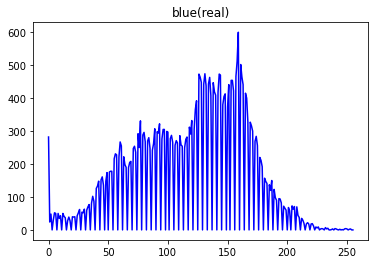

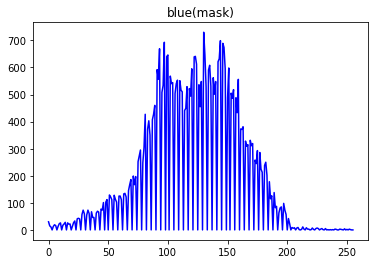

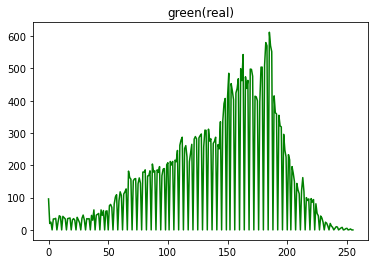

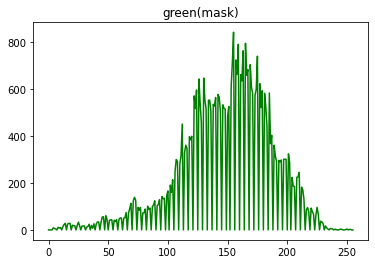

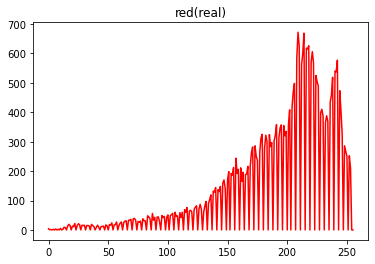

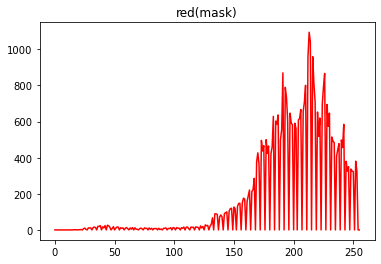

In [116]:
for i, col in enumerate(color):
    histr = cv2.calcHist([normalized_cv_real], [i], None, [256], [0,255])
    plt.plot(histr, color=col)
    plt.title(f"{col}(real)")
    plt.show()
    
    histr = cv2.calcHist([normalized_cv_mask], [i], None, [256], [0,255])
    plt.plot(histr, color=col)
    plt.title(f"{col}(mask)")
    plt.show()
